# Under- and overfitting, model selection

## Preliminaries

In the first set of exercises you had to implement the training and evaluation of the linear regression and $k$-NN methods from scratch in order to practice your `numpy` skills. From this set of exercises onward, you can use the implementations provided in `scikit-learn` or other higher-level libraries. We start this set of exercises by demonstrating some of the features of `scikit-learn`.

For example, implementation of linear regression model fitting with an analytical solution for the parameters is provided by the class `sklearn.linar_model.LinearRegression`. You can train a linear regression model in the following way:

In [1]:
import numpy as np
from sklearn import datasets, linear_model

# load the diabetes dataset
diabetes = datasets.load_diabetes()

# use only one feature
X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

# split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

# create linear regression object
model = linear_model.LinearRegression()

# train the model using the training dataset
model.fit(X_train, y_train)

LinearRegression()

Let's visualize the training dataset and the learned regression model.

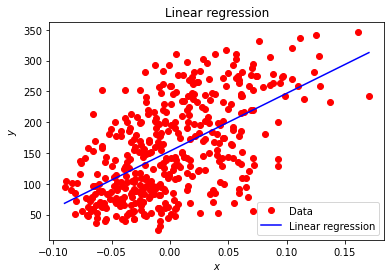

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(X_train, y_train, 'r.', markersize=12)
X_edge = np.array([np.min(X_train, 0), np.max(X_train, 0)])
plt.plot(X_edge, model.predict(X_edge), 'b-')
plt.legend(('Data', 'Linear regression'), loc='lower right')
plt.title('Linear regression')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

Once trained, the model can be used to make predictions on the test data:

In [3]:
# Make predictions using the testing dataset
prediction = model.predict(X_test)

The next step (not shown here) is to evaluate the performance of the trained model.

Note that the `scikit-learn` interface works by first initializing an object from the class that implements the machine learning model (linear regression in this case) and then fitting the initialized model using the data in the training set. Finally, the trained (fitted) model can be used to make predictions on unseen data. In fact, all models implemented in this library follow the same *initialize-fit-predict* programming interface. For example, a $k$-NN classifier can be trained in the following way:

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, neighbors

breast_cancer = datasets.load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target

# make use of the train_test_split() utility function instead
# of manually dividing the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=40)

# initialize a 3-NN classifier
model = neighbors.KNeighborsClassifier(n_neighbors=3)

# train the model using the training dataset
model.fit(X_train, y_train)

# make predictions using the testing dataset
prediction = model.predict(X_test)

Note that the features in the breast cancer dataset have different scales (some have on average very small absolute values, and some very large), which means that the distance metric used by $k$-NN will me dominated by the features with large values. You can use any of the number of feature transformation methods implemented in `scikit-learn` to scale the features. For example, you can use the `sklearn.preprocessing.StandardScaler` method to transform all features to a have a zero mean and unit variance:

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

The scaler has its own parameters which are the means and standard deviations of the features estimated from the training set. If you train a model with the scaled features, you will have to remember to also apply the scaling transformation every time you make a prediction on new unseen and unscaled data. This is somewhat prone to error. One option for making the code more robust is to create a processing pipeline that includes the scaling and $k$-NN models in a sequence:

In [6]:
from sklearn.pipeline import Pipeline

knn = neighbors.KNeighborsClassifier(n_neighbors=15)

model = Pipeline([
                 ("scaler", scaler),
                 ("knn", knn)
                ])

# train the model using the training dataset
model.fit(X_train, y_train)

# make predictions using the testing dataset
prediction = model.predict(X_test)


If you are curious, more information about the design of the `scikit-learn` application programming interface (API) can be found [in this paper](https://arxiv.org/pdf/1309.0238.pdf). 

## Exercises

### Bias-variance decomposition

Show that the mean squared error of the estimate of a parameter can be decomposed into an expression that includes both the bias and variance (Eq. 5.53-5.54 in "Deep learning" by Goodfellow et al.). 

\begin{aligned}
\operatorname{MSE}(\hat{\theta}) &=\mathbb{E}\left[(\hat{\theta}-\theta)^2\right] \\
&=\mathbb{E}\left(\hat{\theta}^2\right)+\mathbb{E}\left(\theta^2\right)-2 \theta \mathbb{E}(\hat{\theta}) \\
&=\operatorname{Var}(\hat{\theta})+(\mathbb{E} \hat{\theta})^2+\theta^2-2 \theta \mathbb{E}(\hat{\theta}) \\
&=\operatorname{Var}(\hat{\theta})+(\mathbb{E} \hat{\theta}-\theta)^2 \\
&=\operatorname{Var}(\hat{\theta})+\operatorname{Bias}^2(\hat{\theta})
\end{aligned}

(From WikiPedia and Deep Learning book, the proof in Goodfellow et al., is even shorter)

### Polynomial regression

For this exercise we will be using generated data to better show the effects of the different polynomial orders.
The data is created using the make_polynomial_regression function.

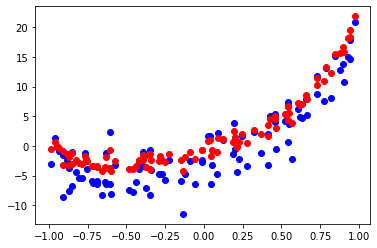

In [11]:
%matplotlib inline
import sys
sys.path.append('code/')

from crossval_helper import generate_dataset

# load generated data
np.random.seed(0)

X, y = generate_dataset(n=100, degree=4, noise=1)
X_test, y_test = generate_dataset(n=100, degree=4, noise=3)

plt.plot(X, y, 'r.', markersize=12)
plt.scatter(X_test, y_test, c='b')
plt.show()

Implement polynomial regression using the `sklearn.preprocessing.PolynomialFeatures` transformation. Using the `sklearn.grid_search.GridSearchCV` class, perform a grid search of the polynomial order hyperparameter space with cross-validation and report the performance on an independent test set.

Plot a learning curve that show the validation accuracy as a function of the polynomial order. 

<p><font color='#770a0a'>Which models have a high bias, and which models have high variance? Motivate your answer.</font><p>
    
Repeat this experiment, this time using the diabetes dataset instead of the generated data.

Best estimator is: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])
Best cross-validation score: -0.92
Test-set score: -3.34


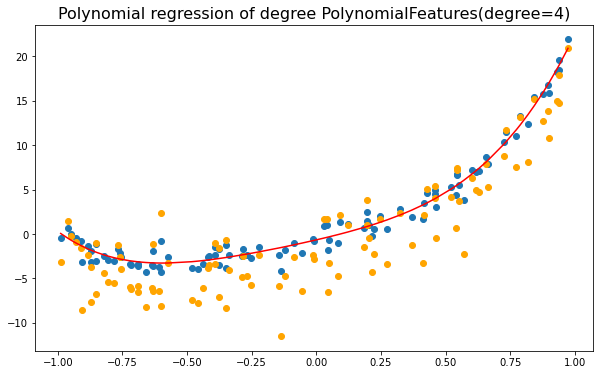

Score of best estimator on training data: -0.910
Score on the separately generated test data: -3.344
Best estimator is: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=6)),
                ('linearregression', LinearRegression())])
Best cross-validation score: -62.90
Test-set score: -52.70
The predicted values are: [215.78860889 108.14361956 170.21636394 107.15106614 113.58835658
 164.13055832 227.55862989 114.76587132  96.74813342 117.19968577
 201.12234129  95.71251735 158.92057286 126.40343698  94.37604471
 178.80969724 136.29987507 136.29987507 192.89962499  94.35795075]
The actual values are: [233.  91. 111. 152. 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.
  48. 178. 104. 132. 220.  57.]
The difference between the predicted and actual values are: [-17.21139111  17.14361956  59.21636394 -44.84893386  -6.41164342
  97.13055832 -82.44137011  20.76587132 -86.25186658  51.19968577
  28.12234129  23.71251735 109.92057286  62.40343698  46.37604471
   0.80969724  32

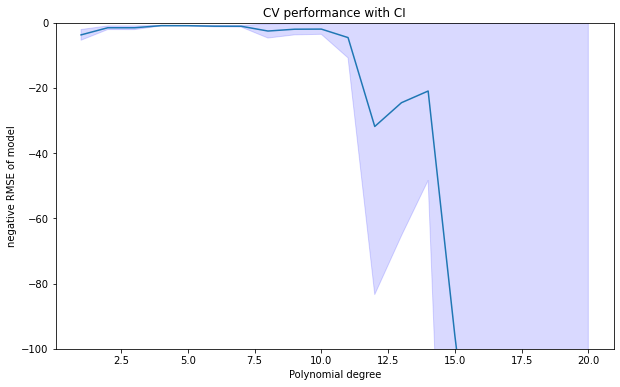

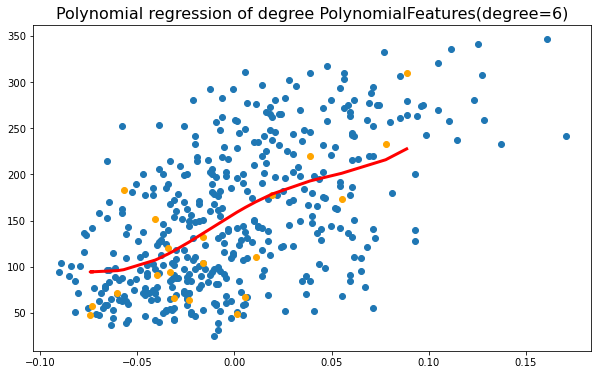

Score of best estimator on training data: -62.416
Score on the separately generated test data: -52.700


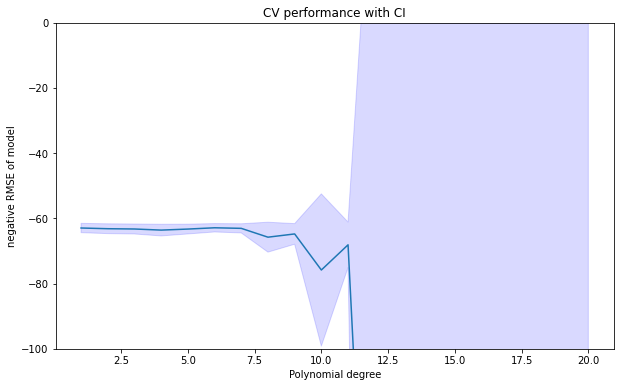

In [12]:
# Using the crossval_helper file we first do the analysis on the synthetic data

from crossval_helper import crossval_gridsearch

synthetic_model = crossval_gridsearch(synthetic=True, synthetic_params=[100, 4, 1, 1, 1])

diabetes_model = crossval_gridsearch(dataset='diabetes')

Low degree polynomials are more likely to have a bias, because they cannot capture the complexity of the data. In the graph of the synthetic data shows this well, as the RMSE values deviate more than for polynomials with a higher degree. For both graphs, when the degree goes further than 6, especially the variance of the RMSE becomes extremely large, because the model will be overfitted to the training data and will also capture outlying features of the data that are not general trends. 

Low degree polynomials are more likely to have a bias, because they cannot capture the complexity of the data. In the graph of the synthetic data shows this well, as the RMSE values deviate more than for polynomials with a higher degree. For both graphs, when the degree goes further than 6, especially the variance of the RMSE becomes extremely large, because the model will be overfitted to the training data and will also capture outlying features of the data that are not general trends. 

### ROC curve analysis
A common method to evaluate binary classifiers is the receiver operating characteristic (ROC) curve. Similar to the week one practicals, implement a $k$-NN classifier on the breast cancer dataset, however, his time use the $k$-NN pipeline from the preliminary. Train the model for different values of $k$ and evaluate their respective performance with an ROC curve, use the `sklearn.metrics.roc_curve` function.

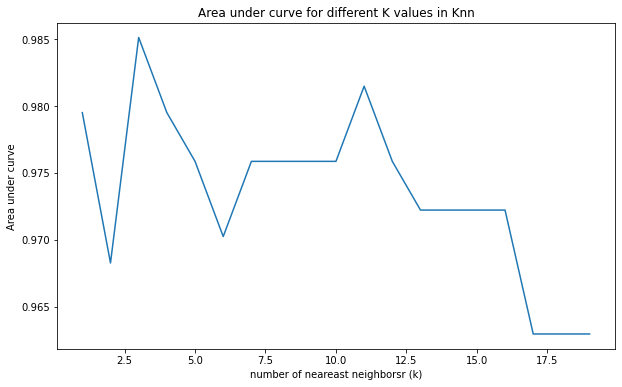

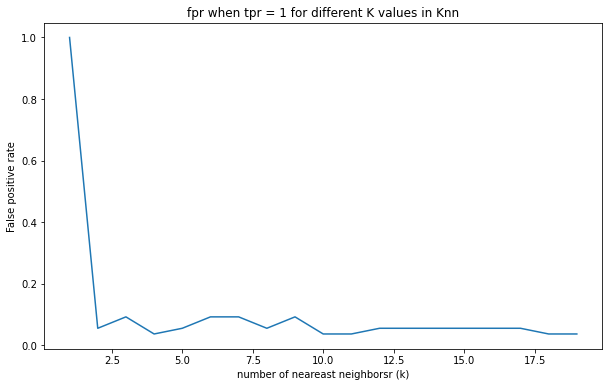

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123) #standard 75/25 split train test

k_list = list(np.arange(20)[1:]) # n=1 to n=19)

auc_scores = []
fpr_scores = []

for k in k_list:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)

    model = Pipeline([
                 ("scaler", scaler), # scaler from introduction cell above
                 ("knn", knn)
                ])

    # train the model using the training dataset
    model.fit(X_train, y_train)

    # make predictions using the testing dataset
    prediction = model.predict(X_test)

    # Add auc to list
    auc_scores.append(roc_auc_score(y_test, prediction))

    # Plot respective ROC curves

    ### Uncomment next line to show plots
    #plot_roc_curve(model, X_test, y_test)
    ###

    # determine false positive rate (fpr) and true positive rate (tpr) at different thresholds
    y_scores = model.predict_proba(X_test)
    fpr,tpr,_ = roc_curve(y_test, y_scores[:,1])

    # find the first index where the tpr is maximal
    i_tprmax = np.where(tpr == 1.)[0][0]

    # find the fpr for the given index
    fpr_tprmax = fpr[i_tprmax]
    
    # add fpr to list
    fpr_scores.append(fpr_tprmax)

    

# Plot area under curve for different k values
fig, ax = plt.subplots(figsize=(10,6))
x = np.arange(20)[1:]
ax.plot(x, auc_scores)
ax.set_ylabel('Area under curve')
ax.set_xlabel('number of neareast neighbours (k)')
ax.set_title('Area under curve for different K values in Knn');

fig, ax2 = plt.subplots(figsize=(10,6))
ax2.plot(x, fpr_scores)
ax2.set_ylabel('False positive rate')
ax2.set_xlabel('number of neareast neighbours (k)')
ax2.set_title('fpr when tpr = 1 for different K values in Knn');


The Area Under the Curve (AUC) has been used as a first metric of how well the ROC are for different k-values in k-NN classification. The best performing number of neighbours is 3, however, this graph is not very regular up until 10 neighbours. After 10 neighbours the Area under the curve becomes worse.

Instead of looking at the Area Under the Curve, it is also possible to look at the performance of the model with the constraint that all patients with cancer should be diagnosed. In case of cancer it might be preferred to choose a threshold with more false positives, if that means that all patients with cancer are also identified. This performance is determined in the lower graph, where the false positive rate is calculated at the point where the true positive rate is 1. For this graph, the performance stabilizes and seems to improve with more neighbours, as the fpr gets lower. The low performance for 1 neighbour classification occurs because there is only one threshold and it does not yield a tpr of 1 at this threshold. 

### $F_1$ score and Dice similarity coefficient

The Dice similarity coefficient is a very popular evaluation measure for image segmentation applications. Assuming that $A$ is the ground truth segmentation of an object represented as a binary image, and $B$ is the binary output of an image segmentation method, the Dice similarity coefficient is computed as:

$\text{Dice}(A,B) = \frac{2|A\cap B|}{|A| + |B|}$

where $|\cdot|$ represents the cardinality of the objects (e.g. $|A|$ is the number of non-zero pixels in the ground truth segmentation).

For example, the Dice similarity can be computed in the following way:

0.3402777777777778


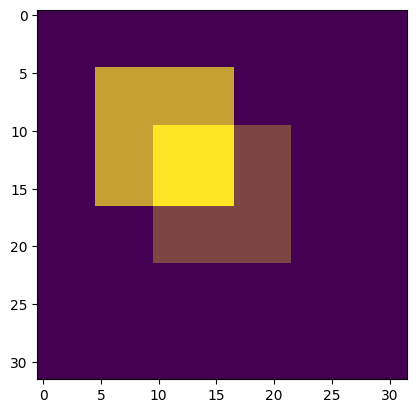

In [12]:
# generate some test objecys
A = np.zeros((32, 32))
A[10:-10, 10:-10] = 1
B = np.zeros((32, 32))
B[5:-15, 5:-15] = 1

dice = 2*np.sum(A*B)/(np.sum(A)+np.sum(B))

# display the results
plt.plot()
plt.imshow(A)
plt.imshow(B, alpha=0.7)

print(dice)

<p><font>Show that the $F_1$ score, which is the harmonic mean of precision and recall, is equivalent to the Dice similarity coefficient</font><p>

##### The definition of F1 score is the following:

$$F1 = {2 \over {{1 \over Precision}+{1 \over Recall}}} $$ 

##### Where precision and recall are defined as the following:

$$ Precision = {TP \over TP + FP} $$
$$ Recall = {TP \over TP + FN} $$

##### If we substitute these formulas in the formula for F1 score:
$$ F1 = {{2TP \over 2TP + FN + FP}} $$ 

##### The dice coefficient is defined as:
$$ Dice = {2*Intersection \over Union + Intersection}$$

##### And the Union and Intersection as per definition:
$$ Union = TP + FN + FP $$

$$ Intersection = TP $$


##### Now if we substitute the definition for Union and Intersection into the Dice definition we get:
$$ Dice = {2TP \over 2TP + FN + FP} = F1 $$ 

##### So we can conclude that the Dice similarity coefficient has the same formula as the harmonic mean of precision and recall (F1 score) and thus is equivalent.